In [6]:
#packages required
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import time
from matplotlib.ticker import PercentFormatter
import warnings
import statistics as stats
from scipy.optimize import curve_fit
import math
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
#to generate honeycomb lattice (size k*k) through a bijection from square lattice 

k=1050 #choose k greater than twice the length of desired SAW to be generated

X = np.zeros((k,k), dtype=float) #stores x component of vertices of honeycomb_
#_lattice corresponding to (i,j) vertex of square lattice, 0 <= i,j <k
#let us call (i,j) the 'square coordinates' of vertices of honeycomb lattice
for i in range(k):
    if i%2==0:
        for j in range(k):
            X[i][j]= i*1.5/2
    else:
        for j in range(k):
            X[i][j]= (i+1)*1.5/2-.5 

Y = np.zeros((k,k), dtype=float) #stores y component of vertices of honeycomb_
#_lattice corresponding to (i,j) vertex of square lattice, 0 <= i,j <k
for i in range(k):
    if i%4==0:
        for j in range(k):
            Y[i][j]= j*np.sqrt(3) 
    elif i%4==1:
        for j in range(k):
            Y[i][j]= j*np.sqrt(3) 
    elif i%4==2:
        for j in range(k):
            Y[i][j]= (j+.5)*np.sqrt(3) 
    else:
        for j in range(k):
            Y[i][j]= (j+.5)*np.sqrt(3) 

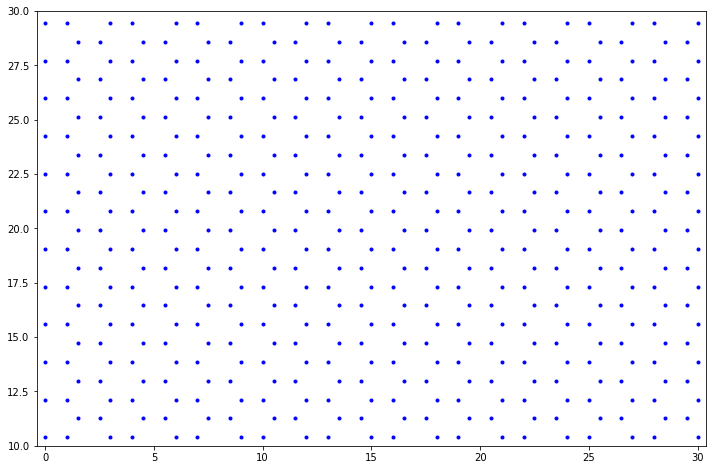

In [ ]:
#to see the generated lattice
plt.figure( figsize=(12,8) )
plt.axis('equal')
plt.xlim([10,20])
plt.ylim([10,30] )
for i in range (k):
    plt.plot( X[i], Y[i], 'b.' )

In [ ]:
def rand_w(n): #function to generate n-step random walks on honeycomb lattice

    #square coordinates of the walk
    x = np.zeros(n+1, dtype=int)
    y = np.zeros(n+1, dtype=int)

    #square coordinate of origin of walks
    x[0] = (k+1)//2 
    y[0] = (k+1)//2
    
    #real coordinates of the walk
    x1 = np.zeros(n+1,dtype=float)
    y1 = np.zeros(n+1,dtype=float)
    
    #real coordinate of origin of the walk
    x1[0] = X[x[0]][y[0]]
    y1[0] = Y[x[0]][y[0]] 
    
    for i in range(1,n+1): #building walks one step at a time
        deltas=[] #neighbors of current position (square coordinates)
      
        #finding neighbors on honeycomb lattice, by calculating distance between square lattice neighbors
        #a point on square lattice has 8 neighbors, of which only 3 correspond to neighbors on honeycomb lattice 
        if (X[x[i-1]][y[i-1]]-X[x[i-1]-1][y[i-1]-1])**2 + (Y[x[i-1]][y[i-1]]-Y[x[i-1]-1][y[i-1]-1])**2 < 1.2:
            deltas.append((-1,-1))
        if (X[x[i-1]][y[i-1]]-X[x[i-1]-1][y[i-1]])**2 + (Y[x[i-1]][y[i-1]]-Y[x[i-1]-1][y[i-1]])**2 < 1.2:
            deltas.append((-1,0))
        if (X[x[i-1]][y[i-1]]-X[x[i-1]-1][y[i-1]+1])**2 + (Y[x[i-1]][y[i-1]]-Y[x[i-1]-1][y[i-1]+1])**2 < 1.2:
            deltas.append((-1,1))

        if (X[x[i-1]][y[i-1]]-X[x[i-1]][y[i-1]-1])**2+ (Y[x[i-1]][y[i-1]]-Y[x[i-1]][y[i-1]-1])**2 < 1.2:
            deltas.append((0,-1))
        if (X[x[i-1]][y[i-1]]-X[x[i-1]][y[i-1]+1])**2+ (Y[x[i-1]][y[i-1]]-Y[x[i-1]][y[i-1]+1])**2 < 1.2:
            deltas.append((0,1))

        if (X[x[i-1]][y[i-1]]-X[x[i-1]+1][y[i-1]-1])**2+ (Y[x[i-1]][y[i-1]]-Y[x[i-1]+1][y[i-1]-1])**2 < 1.2:
            deltas.append((1,-1))
        if (X[x[i-1]][y[i-1]]-X[x[i-1]+1][y[i-1]])**2+ (Y[x[i-1]][y[i-1]]-Y[x[i-1]+1][y[i-1]])**2 < 1.2:
            deltas.append((1,0))
        if (X[x[i-1]][y[i-1]]-X[x[i-1]+1][y[i-1]+1])**2+ (Y[x[i-1]][y[i-1]]-Y[x[i-1]+1][y[i-1]+1])**2 < 1.2:
            deltas.append((1,1))

        dx,dy = deltas[np.random.randint(0,len(deltas))]   #step chosen at random

        #move one step
        x[i]=x[i-1]+dx
        y[i]=y[i-1]+dy  
        x1[i] = (X[x[i]][y[i]])
        y1[i] = (Y[x[i]][y[i]])

    return x1, y1

Text(0.5, 1.0, 'Random walk of length 500 on honeycomb lattice')

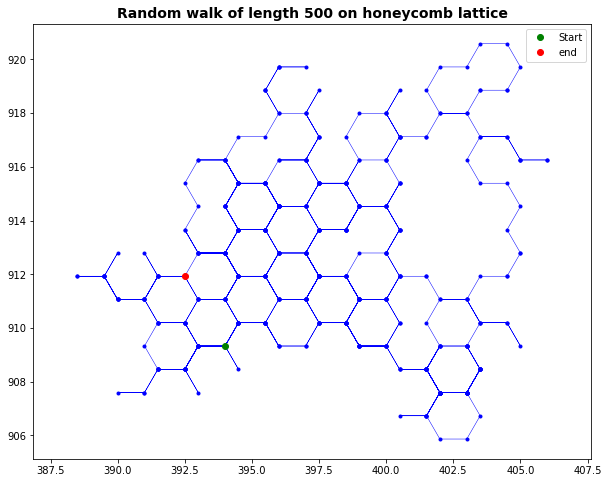

In [ ]:
n=500
a,b = rand_w(n)
plt.figure(figsize=(10,8))
plt.plot(a,b,'b.-',linewidth='0.5')
plt.plot(a[0],b[0],'go',label='Start')
plt.plot(a[n],b[n],'ro',label='end')
plt.legend()
plt.axis('equal')
plt.title('Random walk of length ' + str(len(a)-1) + ' on honeycomb lattice', fontsize=14, fontweight='bold')

In [ ]:
def myopic_saw(n): #function to generate n-step self-avoiding walks on honeycomb lattice

    #square coordinates of the walk
    x = np.zeros(n+1, dtype=int)
    y = np.zeros(n+1, dtype=int)

    #square coordinate of origin of walks
    x[0] = (k+1)//2 
    y[0] = (k+1)//2
    
    #real coordinates of the walk
    x1 = []
    y1 = []
    
    #real coordinate of origin of the walk
    x1.append( X[x[0]][y[0]] )
    y1.append( Y[x[0]][y[0]] )

    positions = set( [(x[0],y[0])] ) #stores visited vertices, used to ensure self-avoidance
    stuck=False #is True if no neighbor is available for next step
    steps = 0 #no. of steps of the SAW before getting stuck
    
    for i in range(1,n+1): #building walks one step at a time
        deltas=[] #neighbors of current position (square coordinates)
        Deltas=[] #free neighbors (not visited before)
      
        #finding neighbors on honeycomb lattice, by calculating distance between square lattice neighbors
        #a point on square lattice has 8 neighbors, of which only 3 correspond to neighbors on honeycomb lattice 
        if (X[x[i-1]][y[i-1]]-X[x[i-1]-1][y[i-1]-1])**2 + (Y[x[i-1]][y[i-1]]-Y[x[i-1]-1][y[i-1]-1])**2 < 1.2:
            deltas.append((-1,-1))
        if (X[x[i-1]][y[i-1]]-X[x[i-1]-1][y[i-1]])**2 + (Y[x[i-1]][y[i-1]]-Y[x[i-1]-1][y[i-1]])**2 < 1.2:
            deltas.append((-1,0))
        if (X[x[i-1]][y[i-1]]-X[x[i-1]-1][y[i-1]+1])**2 + (Y[x[i-1]][y[i-1]]-Y[x[i-1]-1][y[i-1]+1])**2 < 1.2:
            deltas.append((-1,1))

        if (X[x[i-1]][y[i-1]]-X[x[i-1]][y[i-1]-1])**2+ (Y[x[i-1]][y[i-1]]-Y[x[i-1]][y[i-1]-1])**2 < 1.2:
            deltas.append((0,-1))
        if (X[x[i-1]][y[i-1]]-X[x[i-1]][y[i-1]+1])**2+ (Y[x[i-1]][y[i-1]]-Y[x[i-1]][y[i-1]+1])**2 < 1.2:
            deltas.append((0,1))

        if (X[x[i-1]][y[i-1]]-X[x[i-1]+1][y[i-1]-1])**2+ (Y[x[i-1]][y[i-1]]-Y[x[i-1]+1][y[i-1]-1])**2 < 1.2:
            deltas.append((1,-1))
        if (X[x[i-1]][y[i-1]]-X[x[i-1]+1][y[i-1]])**2+ (Y[x[i-1]][y[i-1]]-Y[x[i-1]+1][y[i-1]])**2 < 1.2:
            deltas.append((1,0))
        if (X[x[i-1]][y[i-1]]-X[x[i-1]+1][y[i-1]+1])**2+ (Y[x[i-1]][y[i-1]]-Y[x[i-1]+1][y[i-1]+1])**2 < 1.2:
            deltas.append((1,1))

        for dx,dy in deltas: #checks if neighbors are free
            if (x[i-1] + dx, y[i-1] + dy) not in positions:  
                Deltas.append((dx,dy))
                    
        if Deltas: 
            dx,dy = Deltas[np.random.randint(0,len(Deltas))]   #next step chosen at random
            
            #move one step
            x[i]=x[i-1]+dx
            y[i]=y[i-1]+dy
            x1.append( X[x[i]][y[i]] )
            y1.append( Y[x[i]][y[i]] )
            positions.add((x[i-1]+dx, y[i-1]+dy))
            steps = i
                    
        else: 
            stuck = True
            break

    return x1, y1, steps

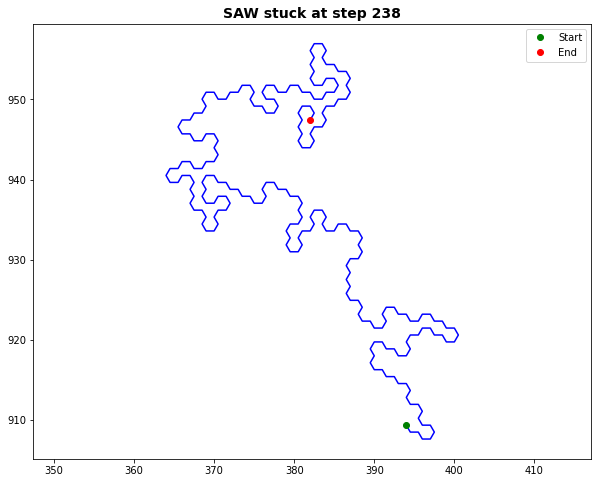

In [ ]:
n=500
a,b,steps = myopic_saw(n)
plt.figure(figsize=(10,8))
plt.plot(a,b,'b-')
plt.plot(a[0],b[0],'go',label='Start')
plt.plot(a[-1],b[-1],'ro',label='End')
plt.legend()
plt.axis('equal')
if steps<n:
    plt.title('SAW stuck at step ' + str(steps), fontsize=14, fontweight='bold')
else:
    plt.title('SAW of length ' + str(n), fontsize=14, fontweight='bold')

In [ ]:
#function to generate n-step SAWs on square lattice using pivot algorithm via m iteration

#elements of the dihedral group
m0 = [[1,0],[0,1]] #identity element
m1 = [[0,1],[-1,0]] #90 degree rotation
m2 = [[-1,0],[0,-1]] #180 degree rotation
m3 = [[0,-1],[1,0]] #270 degree rotation
h = [[1,0],[0,-1]] #reflection through x-axis
v = [[-1,0],[0,1]] #reflection through y-axis
d1 = [[0,1],[1,0]] #reflection through x=y axis
d2 = [[0,-1],[-1,0]] #reflection through x=-y axis
 
G = [m1, m2, m3, h, v, d1, d2] #note that identity is omitted

def pivot(n,m): 

    #old SAW, may not be SAW after operation
    xp = np.arange(n+1) #starting with SAW which is parallel to_
    yp = np.zeros(n+1) #_x-axis, it is called a 'rod'

    #new SAW obtained from old SAW after pivot operation
    Xp = np.arange(n+1)
    Yp = np.zeros(n+1) 

    for i in range(m): #pivot iterations

        #choosing pivot move randomly
        pivot = np.random.randint(0,n)
        symm = G[np.random.randint(0,len(G))] 
        
        #applying pivot operation
        for j in range ( pivot+1, n+1 ): #new 'walk', may not be SAW
            prod = np.dot( symm, [ (xp[j]-xp[pivot]) , (yp[j]-yp[pivot]) ])
            xp[j] = prod[0] + xp[pivot]
            yp[j] = prod[1] + yp[pivot]

        positions = set( [(0,0)] ) #used to check self-avoidance

        for j in range (n+1):
            positions.add( (xp[j], yp[j]) )
    
        #if the walk is self-avoiding after pivot operation
        if len(positions)==n+1: 

            for j in range(n+1): #accept and update
                Xp[j] = xp[j]
                Yp[j] = yp[j]
    
        else: #restore old SAW 
            for j in range(n+1):
                xp[j] = Xp[j]
                yp[j] = Yp[j]
   
    return Xp, Yp

Text(0.5, 1.0, 'SAW of length 10000 on square lattice')

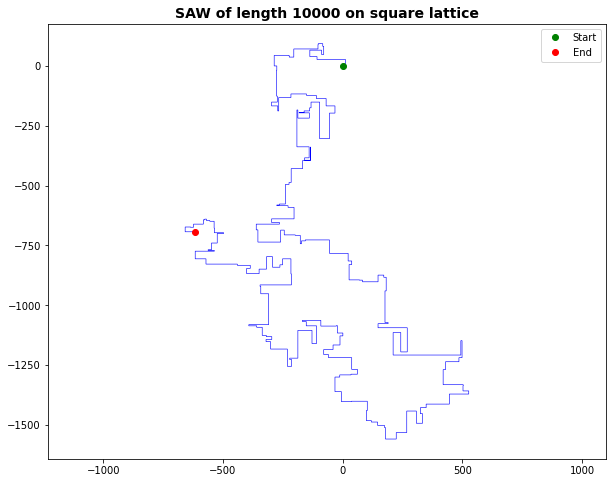

In [ ]:
n=10000
m=1000
a,b = pivot(n,m)
plt.figure(figsize=(10,8))
plt.plot(a,b,'b-',linewidth=0.6)
plt.plot(a[0],b[0],'go',label='Start')
plt.plot(a[-1],b[-1],'ro',label='End')
plt.legend()
plt.axis('equal')
plt.title('SAW of length ' + str(n) + ' on square lattice', fontsize=14, fontweight='bold')

**CONNECTIVE CONSTANT:**
Using the formula $c_n\sim A\mu^nn^{\gamma-1}$ and $B_n=\langle b_n\rangle=c_{2n}/c_n^2$ where $b$ equals 1 if concatenation is successful, i.e., the resulting walk is self-avoiding, and 0 otherwise, we can calculate the connective constant.  

In [7]:
#using pivot algorithm to estimate to estimate connective constant of the lattice
#generate two n-step SAWs and concatenates them
#r is the number of initially rejected iteration

#definition of elements of the dihedral group
m0 = [[1,0],[0,1]] #identity element
m1 = [[0,1],[-1,0]] #90 degree rotation
m2 = [[-1,0],[0,-1]] #180 degree rotation
m3 = [[0,-1],[1,0]] #270 degree rotation
h = [[1,0],[0,-1]] #reflection through x-axis
v = [[-1,0],[0,1]] #reflection through y-axis
d1 = [[0,1],[1,0]] #reflection through x=y axis
d2 = [[0,-1],[-1,0]] #reflection through x=-y axis
 
m_list = [m1, m2, m3, h, v, d1, d2] #note that identity is omitted

def Pivot(n,m,r): 

    #old SAW, may not be SAW after operation
    xp1 = np.arange(n+1) #starting with SAW which is parallel to_
    yp1 = np.zeros(n+1) #_x-axis, it is called a 'rod'
    xp2 = np.arange(n+1) #starting with SAW which is parallel to_
    yp2 = np.zeros(n+1) #_x-axis, it is called a 'rod'

    #new SAW obtained from old SAW after pivot operation
    Xp1 = np.arange(n+1)
    Yp1 = np.zeros(n+1) 
    Xp2 = np.arange(n+1)
    Yp2 = np.zeros(n+1) 

    b = 0 #successful concatenation
    t = 0 #total concatenation

    for i in range(m): #pivot iterations

        piv_success = False #concatenate if atleast one SAW has updated

        ###############################for first SAW######################################
        
        #choosing pivot move randomly
        pivot1 = np.random.randint(0,n)
        symm1 = m_list[np.random.randint(0,len(m_list))] 
        
        #applying pivot operation
        for j in range ( 1, n+1-pivot1 ): #new 'walk', may not be SAW
            prod1 = np.dot( symm1, [ (xp1[pivot1+j]-xp1[pivot1]) , (yp1[pivot1+j]-yp1[pivot1]) ])
            xp1[pivot1+j] = prod1[0] + xp1[pivot1]
            yp1[pivot1+j] = prod1[1] + yp1[pivot1]

        positions1 = set( [(0,0)] ) #used to check self-avoidance

        for j in range (n+1):
            positions1.add( (xp1[j], yp1[j]) )
    
        #if the walk is self-avoiding after pivot operation
        if len(positions1)==n+1: 

            if i>r:
                piv_success = True

            for j in range(n+1): #accept and update
                Xp1[j] = xp1[j]
                Yp1[j] = yp1[j]
    
        else: #restore old SAW 
            for j in range(n+1):
                xp1[j] = Xp1[j]
                yp1[j] = Yp1[j]

        ###############################for second SAW######################################

        #choosing pivot move randomly
        pivot2 = np.random.randint(0,n)
        symm2 = m_list[np.random.randint(0,len(m_list))] 
        
        #applying pivot operation
        for j in range ( 1, n+1-pivot2 ): #new 'walk', may not be SAW
            prod2 = np.dot( symm2, [ (xp2[pivot2+j]-xp2[pivot2]) , (yp2[pivot2+j]-yp2[pivot2]) ])
            xp2[pivot2+j] = prod2[0] + xp2[pivot2]
            yp2[pivot2+j] = prod2[1] + yp2[pivot2]

        positions2 = set( [(0,0)] ) #used to check self-avoidance

        for j in range (n+1):
            positions2.add( (xp2[j], yp2[j]) )
    
        #if the walk is self-avoiding after pivot operation
        if len(positions2)==n+1: 

            if i>r:
                piv_success=True

            for j in range(n+1): #accept and update
                Xp2[j] = xp2[j]
                Yp2[j] = yp2[j]
    
        else: #restore old SAW 
            for j in range(n+1):
                xp2[j] = Xp2[j]
                yp2[j] = Yp2[j]

        ###################################################################################

        if piv_success:
            t = t+1

            positions = positions1

            #second SAW shifted to the end of first
            Wx = []
            Wy = []

            for j in range ( n+1, 2*n+2 ):
                Wx.append( Xp1[n] + Xp2[j-n-1])
                Wy.append( Yp1[n] + Yp2[j-n-1])
                positions.add( (Wx[j-n-1], Wy[j-n-1]) )

            if len(positions)==2*n+1:
                b = b+1

            #to see concatenation, uncomment next three lines and the lines after 'return Bn'
            #plt.plot(Xp1,Yp1,'o-')
            #plt.plot(Wx,Wy,'.-')
            #plt.show()

    Bn=b/t
   
    return Bn

#N, M, R = 10, 10, 0
#Pivot(N,M,R)

In [8]:
#exact number of upto 71-step SAWs is known

A = 0.75
gamma = 43/32
c=70.5104666325 #log(c_71)

N = [ 71,2*71,4*71,8*71,16*71 ] 
M = [1000,3000,10000,50000,200000,1000000]
R = [200,600,2000,10000,40000,200000]
B = []

a = c/71 - (gamma-1)*np.log(2*N[-1])/(2*N[-1]) - np.log(A)/(2*N[-1])

for i in range (len(N)):
    Bn = Pivot( N[i], M[i], R[i] )
    B.append(Bn)

for i in range(len(B)):
    a = a + np.log(B[i])/(2**(len(B)-i)*71) 
print('Connective constant of square lattice is ', np.e**a)

Connective constant of square lattice is  2.6133792517986683
